In [1]:
import numpy
import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn import metrics

/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# train_data : 8비트 부호없는 정수로 이미지를 저장해둔 이미지
# 이미지 처리 기초 참고 : https://datascienceschool.net/view-notebook/9af8d8e93c084bc49f0ac2bb8a20e2a4/
train_data = scipy.io.loadmat('./test_32x32.mat')

In [3]:
# 학습 데이터, 훈련 데이터
raw_x = train_data['X']
raw_y = train_data['y']

In [4]:
# 배열요소의 데이터 타입 확인
# x : (세로픽셀수, 가로픽셀수, 색채널, 레코드 번호)
# y : (0~10사이의 label, 1), dtype : 부호없는 8비트의 정수
raw_x.shape, raw_x.dtype, raw_y.shape, raw_y.dtype

((32, 32, 3, 26032), dtype('uint8'), (26032, 1), dtype('uint8'))

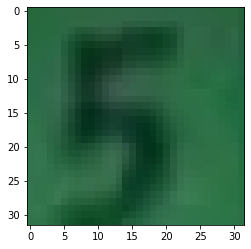

In [5]:
# x 이미지 확인을 위하여 첫번째 이미지 열어보기
img = raw_x[:,:,:,0]
plt.imshow(img)

In [6]:
# y 라벨 확인
unique, counts = numpy.unique(raw_y, return_counts=True)
dict(zip(unique, counts))

{1: 5099,
 2: 4149,
 3: 2882,
 4: 2523,
 5: 2384,
 6: 1977,
 7: 2019,
 8: 1660,
 9: 1595,
 10: 1744}

In [7]:
# 데이터 전처리 
# 1) x행렬을 1차원으로 변환
# x: (32, 32, 3, 26032) > 1차원 전환 x: (32*32*3, 26032) > 라벨이 먼저 오도록 순서 변경 x: (28032, 32*32*3)
x = raw_x.reshape(raw_x.shape[0] * raw_x.shape[1] * raw_x.shape[2], raw_x.shape[3]).T
# 2) y : (26032, 1) > 26032 
y = raw_y.reshape(raw_y.shape[0], )

In [8]:
# 셔플
x, y = shuffle(x, y, random_state=42)

In [9]:
# 학습 훈련 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

In [10]:
# x_test 중 20개만 나중나중의 서비스를 위하여 export 해두기
for i in range(20):
    test_img = x_train[i,:].reshape(32,32,3)
    plt.imsave('test_img_'+str(i)+'.png', test_img, format="png")

In [11]:
# 랜덤 포레스트 객체 생성 및 학습
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
# 정확도 확인
# test 데이터로 해보면 정확도 0.67
# extra 데이터로 해보면 정확도 0.86
y_pred = clf.predict(x_test)
print('정확도: ', metrics.accuracy_score(y_test, y_pred))

정확도:  0.6751152073732719


In [13]:
# 모델 저장
# 학습시킨 모델을 pickled binary file 형태로 저장
joblib.dump(clf, './model_train_32x32.pkl')

['./model_train_32x32.pkl']